In [2]:
# Mounting the google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpmig
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import random
from keras.preprocessing import image
%matplotlib inline

## Load tha data

In [4]:
train_real_dir = os.path.join('/content/drive/MyDrive/archive (6)/real')
train_fake_dir = os.path.join('/content/drive/MyDrive/archive (6)/fake')

In [5]:
labels = pd.read_csv("/content/drive/MyDrive/archive (6)/data.csv")

In [6]:
labels.head()

,images_id,label
0,real_1,real
1,real_10,real
2,real_100,real
3,real_101,real
4,real_102,real


In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   images_id  1289 non-null   object
 1   label      1289 non-null   object
dtypes: object(2)
memory usage: 20.3+ KB


In [8]:
train_real_names = os.listdir(train_real_dir)
print(train_real_names[:10])
train_fake_names = os.listdir(train_fake_dir)
print(train_fake_names[:10])

['real_101.jpg', 'real_105.jpg', 'real_106.jpg', 'real_108.jpg', 'real_102.jpg', 'real_104.jpg', 'real_103.jpg', 'real_107.jpg', 'real_100.jpg', 'real_10.jpg']
['fake_105.jpg', 'fake_106.jpg', 'fake_1.jpg', 'fake_101.jpg', 'fake_102.jpg', 'fake_10.jpg', 'fake_104.jpg', 'fake_100.jpg', 'fake_103.jpg', 'fake_126.jpg']


In [9]:
print('total real images:', len(train_real_names))
print('total fake images:', len(train_fake_names))

total real images: 589
total fake images: 701


## Visualize the data

### Real images

In [10]:
nrows = 5
ncols = 5
def plot_image(folder, names):
    pic_index = np.random.randint(0, len(names))
    img_path = os.path.join(folder, names[pic_index])
    img = mpmig.imread(img_path)
    plt.axis('Off')
    plt.imshow(img)

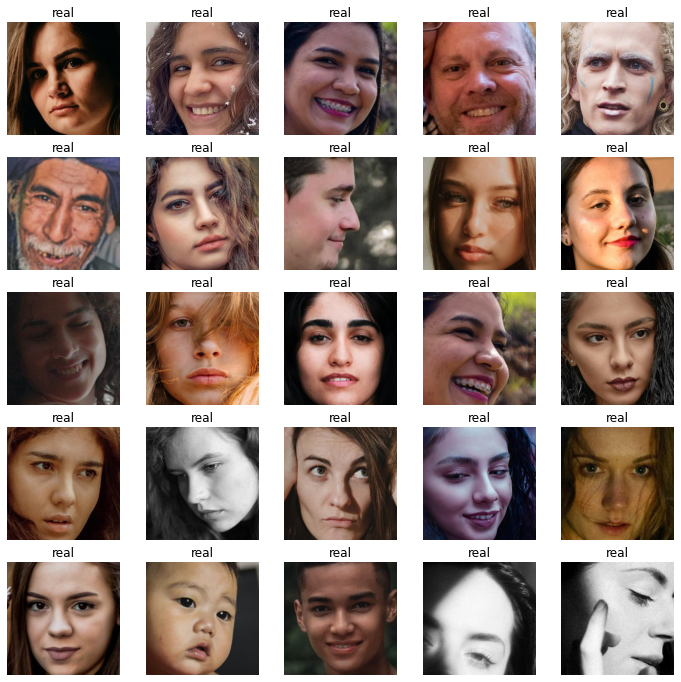

In [11]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.title('real')
    plot_image(train_real_dir, train_real_names)

### Fake images

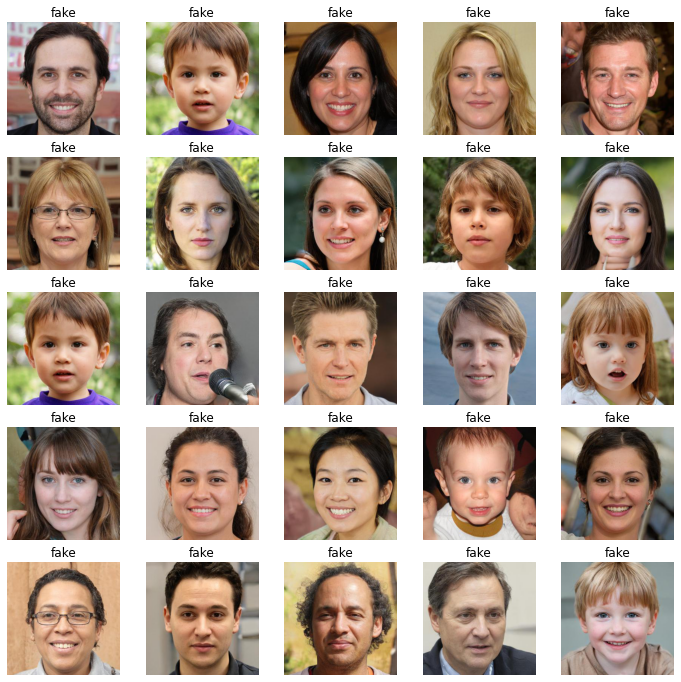

In [12]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.title('fake')
    plot_image(train_fake_dir, train_fake_names)

## Building a Model from Scratch¶

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
     tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [16]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                  zoom_range=0.1,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (6)', 
        target_size=(300, 300), 
        batch_size=32,
        class_mode='binary')

Found 1290 images belonging to 2 classes.


In [17]:
history=model.fit(
    train_generator,
    steps_per_epoch=41,
    epochs=100
)

Epoch 1/100
41/41 [==============================] - 37s 642ms/step - loss: 0.6798 - accuracy: 0.5721
Epoch 2/100
41/41 [==============================] - 28s 672ms/step - loss: 0.5433 - accuracy: 0.7140
Epoch 3/100
41/41 [==============================] - 27s 668ms/step - loss: 0.4503 - accuracy: 0.7884
Epoch 4/100
41/41 [==============================] - 27s 665ms/step - loss: 0.4429 - accuracy: 0.7961
Epoch 5/100
41/41 [==============================] - 27s 660ms/step - loss: 0.3653 - accuracy: 0.8496
Epoch 6/100
41/41 [==============================] - 27s 661ms/step - loss: 0.3759 - accuracy: 0.8426
Epoch 7/100
41/41 [==============================] - 27s 666ms/step - loss: 0.4273 - accuracy: 0.8070
Epoch 8/100
41/41 [==============================] - 27s 662ms/step - loss: 0.3728 - accuracy: 0.8333
Epoch 9/100
41/41 [==============================] - 27s 660ms/step - loss: 0.3206 - accuracy: 0.8643
Epoch 10/100
41/41 [==============================] - 27s 657ms/step - loss: 0.261

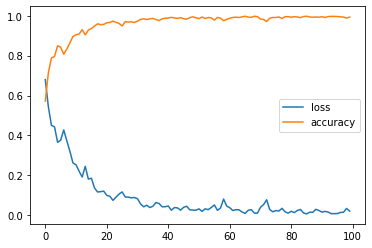

In [18]:
pd.DataFrame(history.history).plot()